In [2]:
# preparation
import tensorflow as tf
from tensorflow import keras 
# Common imports
import numpy as np
import pandas as pd
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [3]:
stockdata = pd.read_csv('KO.csv')
stockdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,14.492252,16355800
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,14.347014,20237200
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.116528,21307800
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.185989,21581000
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.283875,20087000
...,...,...,...,...,...,...,...
2763,2019-12-24,54.799999,55.000000,54.639999,54.709999,54.234360,3359300
2764,2019-12-26,54.919998,55.020000,54.790001,55.020000,54.541668,6228500
2765,2019-12-27,55.009998,55.450001,55.000000,55.349998,54.868797,6895500
2766,2019-12-30,55.180000,55.389999,55.060001,55.270000,54.789494,6431700


In [4]:
T = stockdata.iloc[:, 4:5].copy()
X = stockdata.iloc[:,0:4].copy()
X = pd.concat([X,stockdata.iloc[:,5:].copy()],axis=1)

X["Date"] = pd.to_datetime(X["Date"]).dt.strftime("%Y%m%d").astype(int)
X.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
X

,Date,Open,High,Low,Adj Close,Volume
0,20090102,22.700001,23.000000,22.520000,14.492252,16355800
1,20090105,22.785000,22.945000,22.590000,14.347014,20237200
2,20090106,22.850000,22.985001,22.230000,14.116528,21307800
3,20090107,22.110001,22.590000,22.110001,14.185989,21581000
4,20090108,22.420000,22.639999,22.280001,14.283875,20087000
...,...,...,...,...,...,...
2763,20191224,54.799999,55.000000,54.639999,54.234360,3359300
2764,20191226,54.919998,55.020000,54.790001,54.541668,6228500
2765,20191227,55.009998,55.450001,55.000000,54.868797,6895500
2766,20191230,55.180000,55.389999,55.060001,54.789494,6431700


In [6]:
D = pd.concat([X, T], axis=1)

In [7]:
#def temp_scatter(D):
    #fig, axes = plt.subplots(3,2)
    #fig.set_figheight(12)
   # fig.set_figwidth(16)
   # for i,c  in enumerate(X.columns.values):
  #      D.plot.scatter('Close',c , ax=axes[int(i/2), i%5])
 #   fig.tight_layout()
    
#temp_scatter(D)

Text(0.5, 0, 'Close')

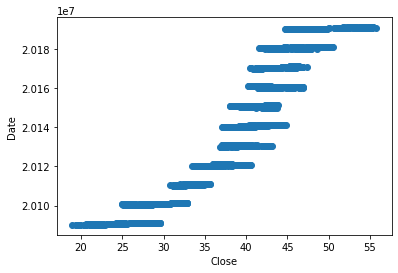

In [8]:


plt.scatter(T,X.iloc[:,0:1])
plt.ylabel("Date")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

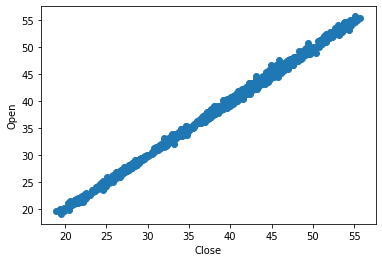

In [9]:
plt.scatter(T,X.iloc[:,1:2])
plt.ylabel("Open")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

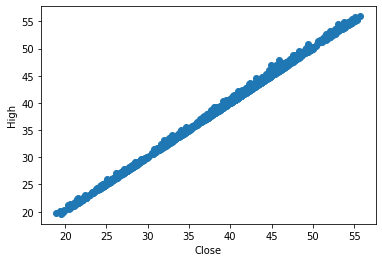

In [10]:
plt.scatter(T,X.iloc[:,2:3])
plt.ylabel("High")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

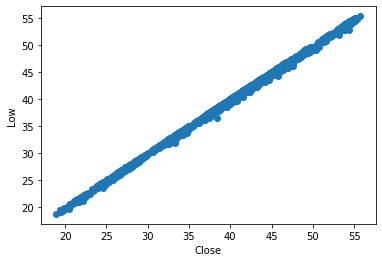

In [11]:
plt.scatter(T,X.iloc[:,3:4])
plt.ylabel("Low")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

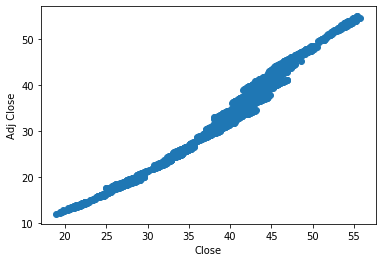

In [12]:
plt.scatter(T,X.iloc[:,4:5])
plt.ylabel("Adj Close")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

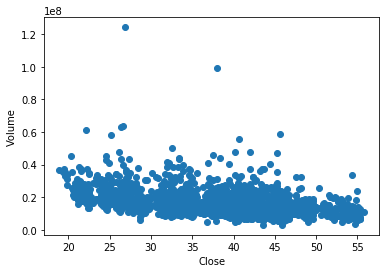

In [13]:
plt.scatter(T,X.iloc[:,5:6])
plt.ylabel("Volume")
plt.xlabel("Close")

Text(0.5, 0, 'Date')

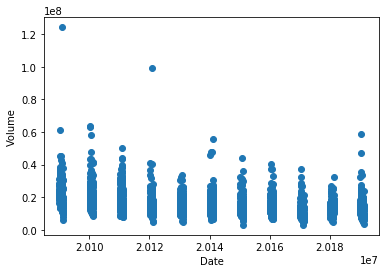

In [14]:
plt.scatter(X.iloc[:,0:1],X.iloc[:,5:6])
plt.ylabel("Volume")
plt.xlabel("Date")

In [15]:
X = X.drop(["Adj Close"],axis=1)

In [16]:
T = T.values

In [17]:
T

array([[22.950001],
       [22.719999],
       [22.355   ],
       ...,
       [55.349998],
       [55.27    ],
       [55.349998]])

In [18]:
X = X.values

In [19]:
def standardize(X, mean, std):
    return (X-mean) / std

In [20]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

XS = standardize(X, mean, std)

In [21]:
import partitionlib as ptl

In [22]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X), copy(T))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

Xtrain, Xtest, Ttrain, Ttest = partition_data(XS, T)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (2214, 5)
Train target shape: (2214, 1)
Test data shape: (554, 5)
Test target shape: (554, 1)


In [91]:
cokemodel = keras.Sequential([
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)
])

In [92]:
cokemodel.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.001))

In [25]:
history = model.fit(Xtrain, Ttrain, epochs=30)

Train on 2214 samples
Epoch 1/30
2214/2214 [==============================] - 0s 105us/sample - loss: 323.5035
Epoch 2/30
2214/2214 [==============================] - 0s 27us/sample - loss: 14.7457
Epoch 3/30
2214/2214 [==============================] - 0s 25us/sample - loss: 3.8688
Epoch 4/30
2214/2214 [==============================] - 0s 25us/sample - loss: 6.6671
Epoch 5/30
2214/2214 [==============================] - 0s 26us/sample - loss: 0.5131
Epoch 6/30
2214/2214 [==============================] - 0s 26us/sample - loss: 0.5384
Epoch 7/30
2214/2214 [==============================] - 0s 27us/sample - loss: 0.2313
Epoch 8/30
2214/2214 [==============================] - 0s 25us/sample - loss: 0.7608
Epoch 9/30
2214/2214 [==============================] - 0s 26us/sample - loss: 0.4938
Epoch 10/30
2214/2214 [==============================] - 0s 25us/sample - loss: 0.7661
Epoch 11/30
2214/2214 [==============================] - 0s 25us/sample - loss: 0.1148
Epoch 12/30
2214/2214 [===

In [26]:
error = model.evaluate(Xtest, Ttest)
error

554/554 [==============================] - 0s 94us/sample - loss: 0.0595


0.059503384337958876

In [27]:
y = model.predict(Xtest)
y

array([[42.07955 ],
       [43.19838 ],
       [43.39981 ],
       [44.925354],
       [42.949642],
       [20.273254],
       [49.289543],
       [44.538334],
       [38.609867],
       [39.880974],
       [34.890644],
       [31.396397],
       [44.674774],
       [27.346544],
       [23.929   ],
       [43.490814],
       [42.492603],
       [32.234737],
       [42.102314],
       [33.505928],
       [41.84786 ],
       [43.400227],
       [45.130356],
       [37.90274 ],
       [20.402775],
       [31.00073 ],
       [39.904987],
       [32.74387 ],
       [44.35579 ],
       [34.005016],
       [41.684124],
       [44.364147],
       [43.608086],
       [41.140495],
       [26.115963],
       [38.048733],
       [26.230013],
       [33.71765 ],
       [42.579235],
       [24.060102],
       [37.432835],
       [41.491276],
       [33.495453],
       [43.56349 ],
       [44.75532 ],
       [40.498833],
       [40.437614],
       [41.625797],
       [45.484497],
       [37.963306],


In [28]:
y.shape

(554, 1)

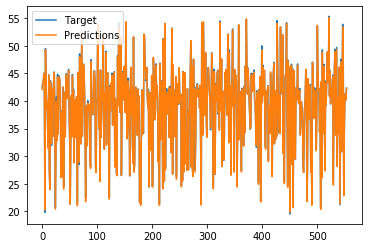

In [29]:
plt.plot(Ttest, label = 'Target')
plt.plot(y, label = 'Predictions')
plt.legend()

In [30]:
X.shape

(2768, 5)

In [31]:
Xnew = np.delete(X,2767,0)
Tnew = np.delete(T,0,0)

In [32]:
T

array([[22.950001],
       [22.719999],
       [22.355   ],
       ...,
       [55.349998],
       [55.27    ],
       [55.349998]])

In [33]:
X

array([[2.0090102e+07, 2.2700001e+01, 2.3000000e+01, 2.2520000e+01,
        1.6355800e+07],
       [2.0090105e+07, 2.2785000e+01, 2.2945000e+01, 2.2590000e+01,
        2.0237200e+07],
       [2.0090106e+07, 2.2850000e+01, 2.2985001e+01, 2.2230000e+01,
        2.1307800e+07],
       ...,
       [2.0191227e+07, 5.5009998e+01, 5.5450001e+01, 5.5000000e+01,
        6.8955000e+06],
       [2.0191230e+07, 5.5180000e+01, 5.5389999e+01, 5.5060001e+01,
        6.4317000e+06],
       [2.0191231e+07, 5.5200001e+01, 5.5380001e+01, 5.4980000e+01,
        7.9826000e+06]])

In [34]:
Tnew

array([[22.719999],
       [22.355   ],
       [22.465   ],
       ...,
       [55.349998],
       [55.27    ],
       [55.349998]])

In [35]:
Xnew

array([[2.0090102e+07, 2.2700001e+01, 2.3000000e+01, 2.2520000e+01,
        1.6355800e+07],
       [2.0090105e+07, 2.2785000e+01, 2.2945000e+01, 2.2590000e+01,
        2.0237200e+07],
       [2.0090106e+07, 2.2850000e+01, 2.2985001e+01, 2.2230000e+01,
        2.1307800e+07],
       ...,
       [2.0191226e+07, 5.4919998e+01, 5.5020000e+01, 5.4790001e+01,
        6.2285000e+06],
       [2.0191227e+07, 5.5009998e+01, 5.5450001e+01, 5.5000000e+01,
        6.8955000e+06],
       [2.0191230e+07, 5.5180000e+01, 5.5389999e+01, 5.5060001e+01,
        6.4317000e+06]])

In [36]:
meannew = np.mean(Xnew, axis=0)
stdnew = np.std(Xnew, axis=0)

XSnew = standardize(Xnew, meannew, stdnew)

In [37]:
XNtrain, XNtest, TNtrain, TNtest = partition_data(XSnew, Tnew)
print("Train data shape: {}".format(XNtrain.shape))
print("Train target shape: {}".format(TNtrain.shape))
print("Test data shape: {}".format(XNtest.shape))
print("Test target shape: {}".format(TNtest.shape))

Train data shape: (2214, 5)
Train target shape: (2214, 1)
Test data shape: (553, 5)
Test target shape: (553, 1)


In [93]:
history2 = cokemodel.fit(XNtrain, TNtrain, epochs=50)

Train on 2214 samples
Epoch 1/50
2214/2214 [==============================] - 0s 100us/sample - loss: 387.3919
Epoch 2/50
2214/2214 [==============================] - 0s 28us/sample - loss: 9.2280
Epoch 3/50
2214/2214 [==============================] - 0s 28us/sample - loss: 1.0487
Epoch 4/50
2214/2214 [==============================] - 0s 25us/sample - loss: 1.8414
Epoch 5/50
2214/2214 [==============================] - 0s 27us/sample - loss: 0.6900
Epoch 6/50
2214/2214 [==============================] - 0s 28us/sample - loss: 1.8201
Epoch 7/50
2214/2214 [==============================] - 0s 32us/sample - loss: 1.1667
Epoch 8/50
2214/2214 [==============================] - 0s 28us/sample - loss: 0.2514
Epoch 9/50
2214/2214 [==============================] - 0s 29us/sample - loss: 0.2822
Epoch 10/50
2214/2214 [==============================] - 0s 27us/sample - loss: 1.3561
Epoch 11/50
2214/2214 [==============================] - 0s 28us/sample - loss: 0.9757
Epoch 12/50
2214/2214 [====

In [94]:
error = cokemodel.evaluate(XNtest, TNtest)
error

553/553 [==============================] - 0s 96us/sample - loss: 0.2458


0.2457753174667117

In [79]:
y = cokemodel.predict(XNtest)
y

array([[37.160294],
       [47.862274],
       [38.441223],
       [41.56264 ],
       [53.576164],
       [25.289175],
       [46.04146 ],
       [33.687996],
       [27.23361 ],
       [34.86558 ],
       [26.52545 ],
       [31.363398],
       [39.189396],
       [44.008698],
       [46.557125],
       [26.772608],
       [37.598488],
       [41.608807],
       [39.962967],
       [40.194214],
       [26.588835],
       [43.51531 ],
       [45.59458 ],
       [33.66001 ],
       [43.56102 ],
       [27.266684],
       [42.468563],
       [41.263687],
       [43.433426],
       [27.211428],
       [38.626263],
       [40.480827],
       [24.418182],
       [24.147186],
       [42.11838 ],
       [32.612167],
       [45.547554],
       [46.033962],
       [44.88082 ],
       [40.503075],
       [41.761417],
       [38.083523],
       [45.649445],
       [26.987955],
       [27.752443],
       [28.127668],
       [23.967974],
       [45.616978],
       [40.629715],
       [34.232033],


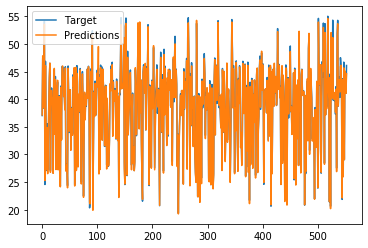

In [80]:
plt.plot(TNtest, label = 'Target')
plt.plot(y, label = 'Predictions')
plt.legend()

In [81]:
def plot_result(Y, T, title=None):
    """
        Plots predicted and true labels.

        Args:
            Y (numpy.ndarray): Predicted labels

            T (numpy.ndarray): True labels

            title (str): Title for the plot
    """
    if len(T.shape) > 1:
        T = T.squeeze()
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Stock Closing Price")
    plt.xlabel("Samples(days)")
    #plt.ylim([-1,4])
    plt.title(title)

    # accuracy
#    print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

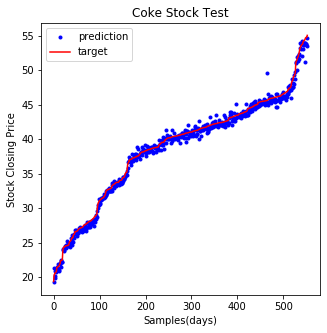

In [82]:
plot_result(y,TNtest,title = 'Coke Stock Test')

In [110]:
fivePercentOff = 0
tenPercentOff = 0
belowFivePercent = 0

for i in range(len(Y)):
    if(abs(y[i] - TNtest[i]) > TNtest[i]*.1):
        tenPercentOff += 1
    elif(abs(y[i] - TNtest[i]) > TNtest[i]*.05):
        fivePercentOff += 1
    else:
        belowFivePercent += 1

In [111]:
fivePercentOff

2

In [112]:
tenPercentOff

0

In [113]:
belowFivePercent

551

In [101]:
morethanfive = 0
lessthanfive = 0

for i in range(len(y)):
    if((y[i] - TNtest[i]) > 3):
        morethanfive = morethanfive + 1
    if((TNtest[i] - y[i]) > 3):
        lessthanfive = lessthanfive + 1

In [102]:
morethanfive

1

In [103]:
lessthanfive

1

In [42]:
Tnew.shape

(2767, 1)

In [43]:
Xnew.shape

(2767, 5)

In [48]:
XtrainB = copy(XSnew[:2214,:])
XtestB = copy(XSnew[2214:,:])

In [49]:
TtrainB = copy(Tnew[:2214,:])
TtestB = copy(Tnew[2214:,:])

In [58]:
model2 = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'), 
    keras.layers.Dense(1)
])

In [59]:
model2.compile(loss="mse", optimizer='nadam')

In [60]:
history3 = model2.fit(XtrainB, TtrainB, epochs=50)

Train on 2214 samples
Epoch 1/50
2214/2214 [==============================] - 1s 257us/sample - loss: 1393.9066
Epoch 2/50
2214/2214 [==============================] - 0s 40us/sample - loss: 1276.5890
Epoch 3/50
2214/2214 [==============================] - 0s 30us/sample - loss: 576.9597
Epoch 4/50
2214/2214 [==============================] - 0s 31us/sample - loss: 186.0247
Epoch 5/50
2214/2214 [==============================] - 0s 30us/sample - loss: 124.6683
Epoch 6/50
2214/2214 [==============================] - 0s 31us/sample - loss: 80.0082
Epoch 7/50
2214/2214 [==============================] - 0s 30us/sample - loss: 48.8962
Epoch 8/50
2214/2214 [==============================] - 0s 30us/sample - loss: 28.1193
Epoch 9/50
2214/2214 [==============================] - 0s 30us/sample - loss: 16.6030
Epoch 10/50
2214/2214 [==============================] - 0s 32us/sample - loss: 11.1928
Epoch 11/50
2214/2214 [==============================] - 0s 30us/sample - loss: 7.7874
Epoch 12/50


In [64]:
error = model2.evaluate(XtestB, TtestB)
error

553/553 [==============================] - 0s 90us/sample - loss: 1.9386


1.9386361572238033

In [62]:
Y = model2.predict(XtestB)
Y

array([[46.429913],
       [46.30681 ],
       [46.432796],
       [46.288914],
       [46.133877],
       [45.581245],
       [46.14475 ],
       [46.013786],
       [46.137527],
       [46.072117],
       [45.759064],
       [46.12686 ],
       [46.241676],
       [45.543243],
       [45.29227 ],
       [46.099903],
       [46.173935],
       [46.124386],
       [46.685165],
       [46.884956],
       [46.49276 ],
       [46.43067 ],
       [45.64696 ],
       [46.190983],
       [45.721615],
       [45.752396],
       [46.207355],
       [46.210983],
       [45.968403],
       [45.437847],
       [45.047703],
       [45.012794],
       [46.129673],
       [46.190125],
       [46.51763 ],
       [45.66849 ],
       [45.017296],
       [45.13455 ],
       [45.25676 ],
       [45.33859 ],
       [45.980095],
       [47.292923],
       [45.95571 ],
       [45.96649 ],
       [46.150578],
       [45.47151 ],
       [45.95741 ],
       [45.96982 ],
       [46.093178],
       [45.884644],


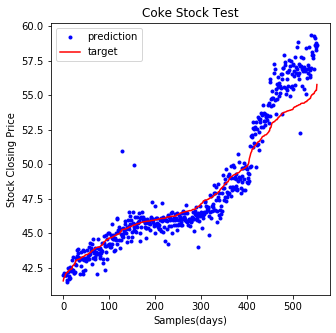

In [63]:
plot_result(Y,TtestB,title = 'Coke Stock Test')